In [3]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

# Simple case

Triangulation of a set of points and its visualization.

(4, 2)


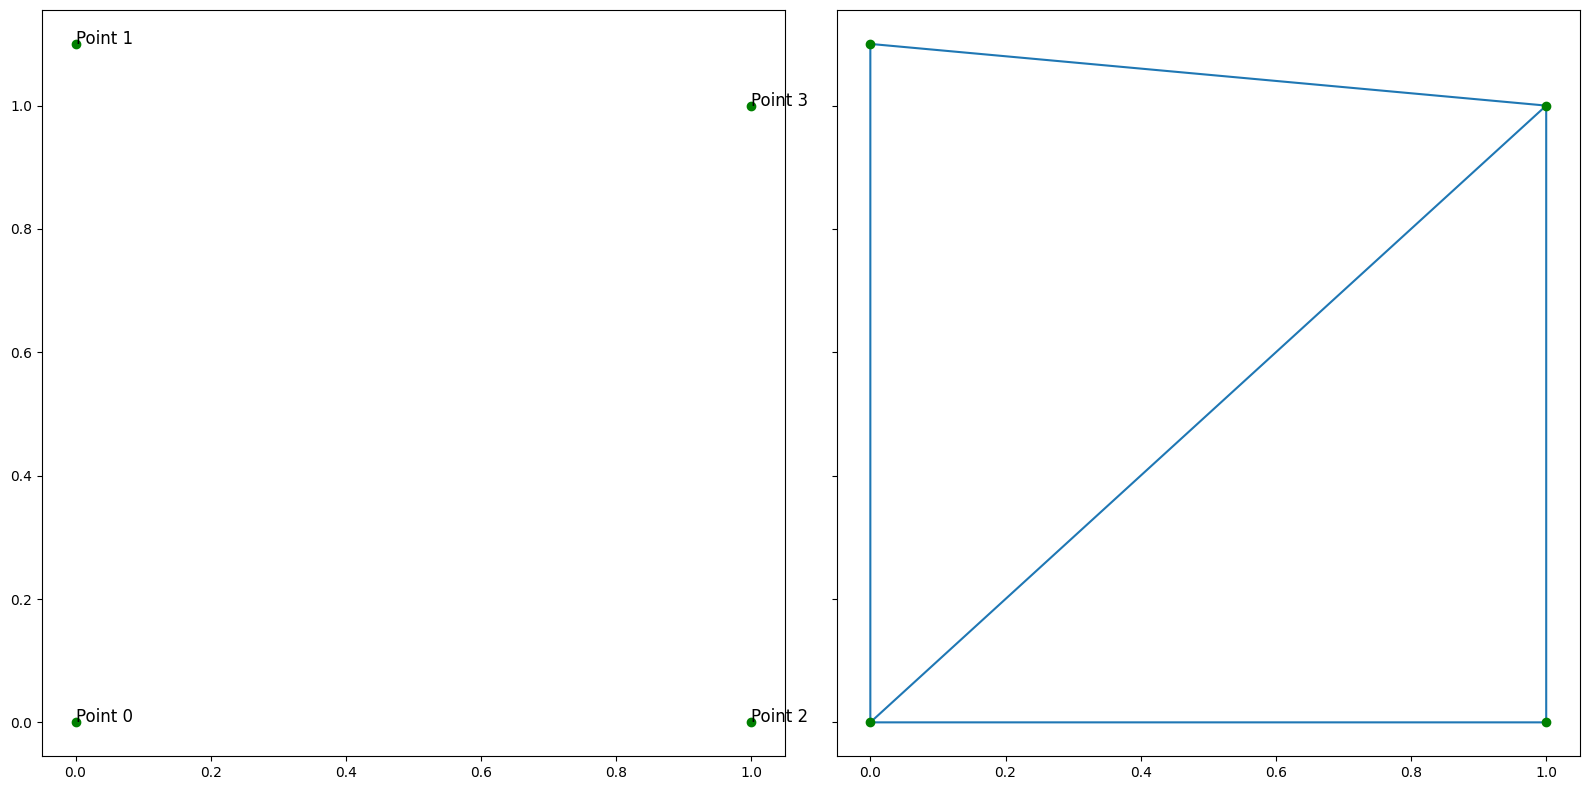

In [41]:
points = np.array([[0, 0], [0, 1.1], [1, 0], [1, 1]])
print(points.shape)
tri = Delaunay(points)


fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
axs[0].plot(points[:,0], points[:,1], 'go') # just the points

for i in range(len(points)):
    axs[0].text(points[i,0], points[i,1], f"Point {i}", fontsize=12, color="black")

axs[1].triplot(points[:,0], points[:,1], tri.simplices)
axs[1].plot(points[:,0], points[:,1], 'go') # just the points

plt.tight_layout()
plt.show()

The vertices that forms the triangle, for example the first triangle is form by points 2, 3 and 0, corresponding to the bottom triangle

In [ ]:
tri.simplices 

array([[2, 3, 0],
       [3, 1, 0]], dtype=int32)

We can find out which triangle points are in:

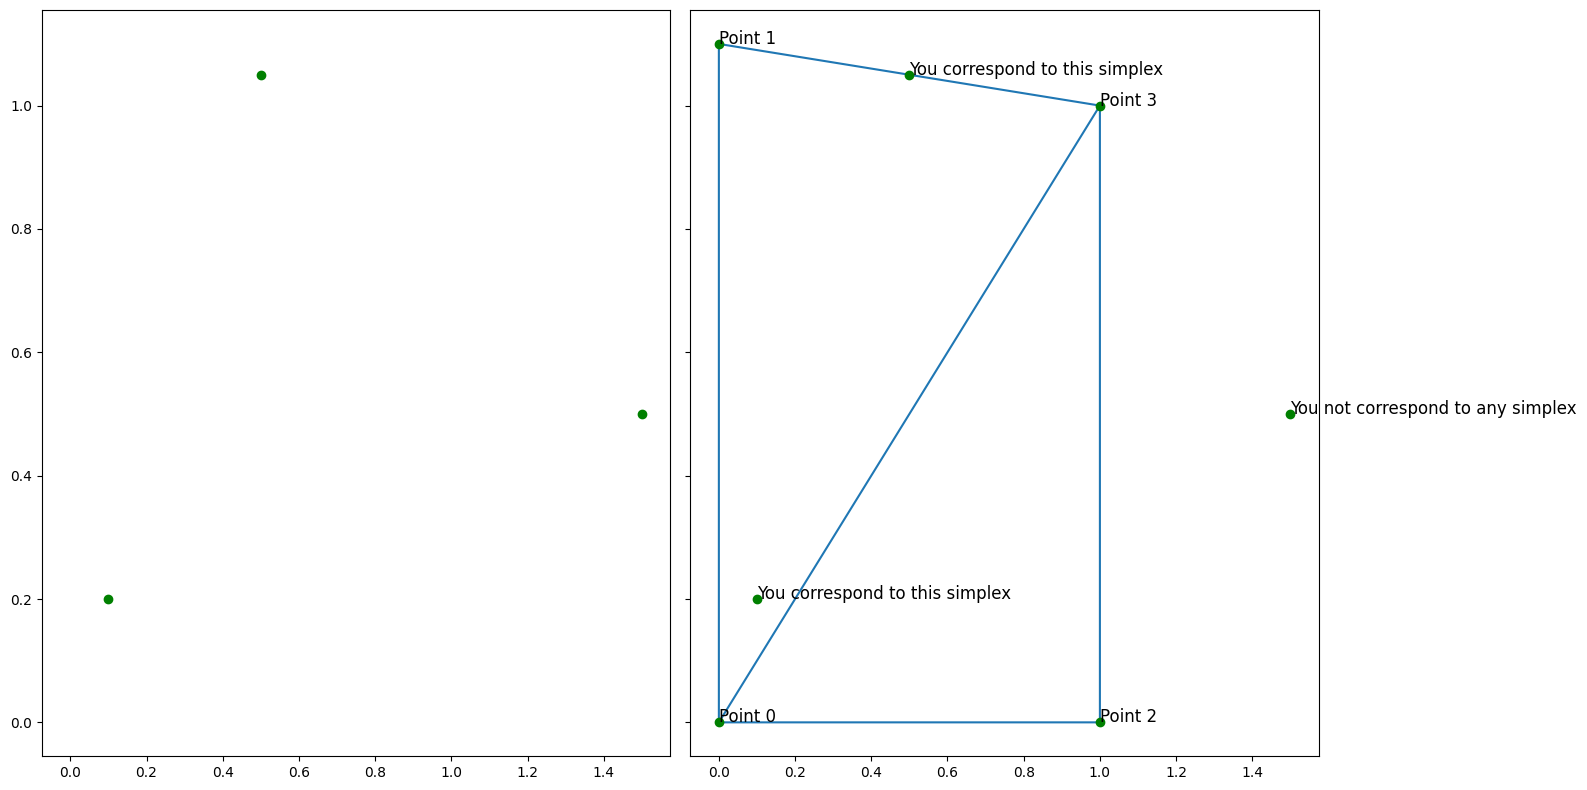

In [56]:
p = np.array([(0.1, 0.2), (1.5, 0.5), (0.5, 1.05)])
inside = tri.find_simplex(p)

fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
axs[0].plot(p[:,0], p[:,1], 'go') # just the points

axs[1].plot(p[:,0], p[:,1], 'go') # just the points
for i in range(len(p)):
    if inside[i] == 1:
        axs[1].text(p[i,0], p[i,1], f"You correspond to this simplex", fontsize=12, color="black")
    else:
         axs[1].text(p[i,0], p[i,1], f"You not correspond to any simplex", fontsize=12, color="black")

axs[1].triplot(points[:,0], points[:,1], tri.simplices)
axs[1].plot(points[:,0], points[:,1], 'go') # just the points
for i in range(len(points)):
    axs[1].text(points[i,0], points[i,1], f"Point {i}", fontsize=12, color="black")

plt.tight_layout()
plt.show()


In [60]:
tri.simplices[tri.find_simplex(p[inside==1])] # it said to which simplex, and which vertex form the simple the point correspond, only for valid points

array([[3, 1, 0],
       [3, 1, 0]], dtype=int32)

We can also compute barycentric coordinates in triangle 1 for these points:

The coordinates for the first point are all positive, meaning it is indeed inside the triangle. The third point is on an edge, hence its null third coordinate.

In [61]:
b = tri.transform[1,:2].dot(np.transpose(p - tri.transform[1,2]))
np.c_[np.transpose(b), 1 - b.sum(axis=0)]

array([[ 0.1       ,  0.09090909,  0.80909091],
       [ 1.5       , -0.90909091,  0.40909091],
       [ 0.5       ,  0.5       ,  0.        ]])

# For a time series (let think about it)

(100, 1)
(100, 1)
(100, 2)


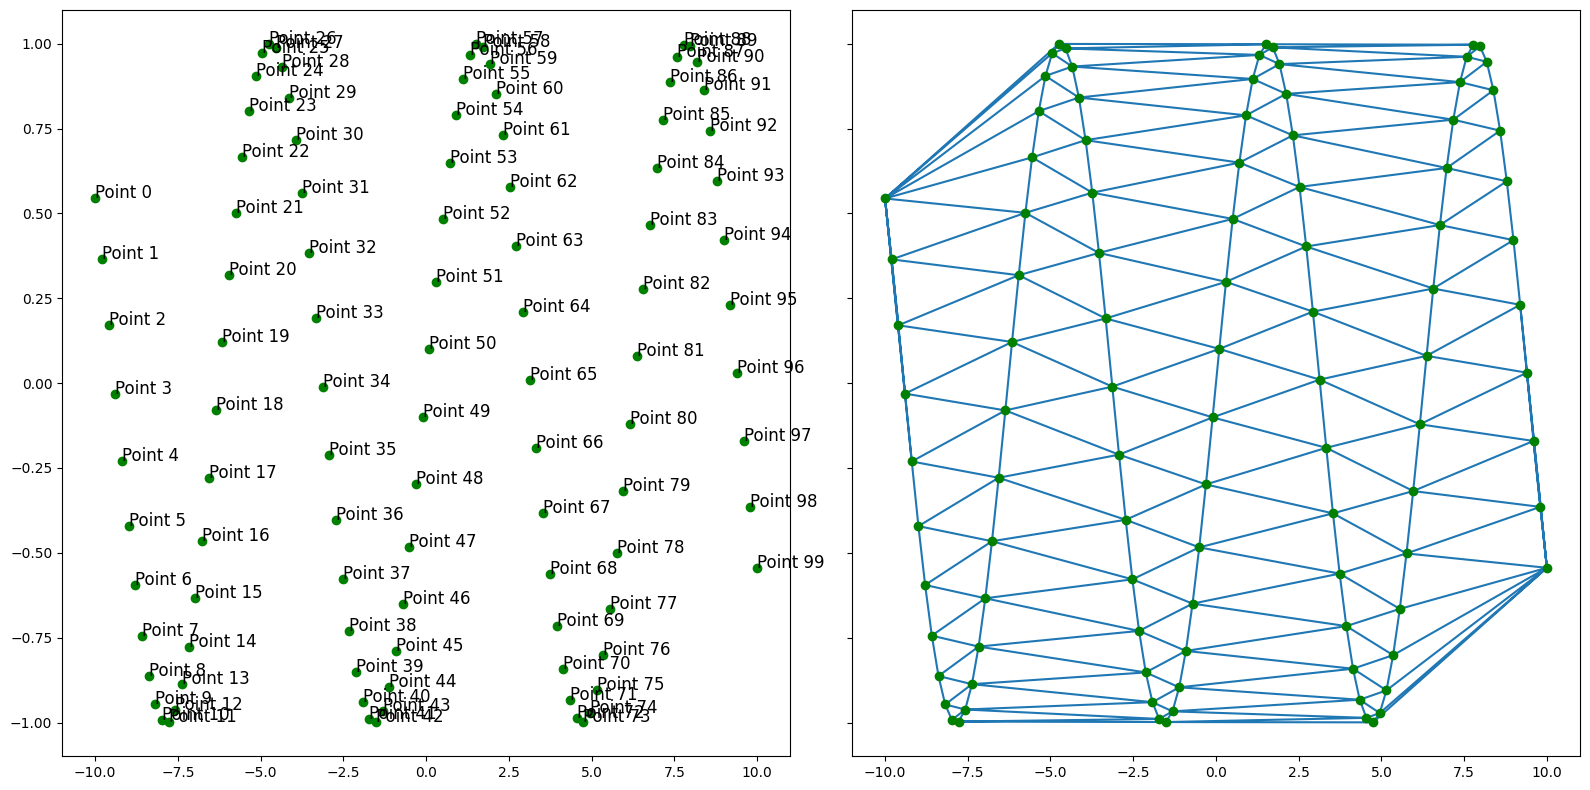

In [34]:
x = np.linspace(-10,10,100).reshape((100,-1))
print(x.shape)
y = np.sin(x)
print(y.shape)

points = np.concatenate((x,y),axis=1)
print(points.shape) # need in this shape

tri = Delaunay(points)

fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
axs[0].plot(points[:,0], points[:,1], 'go') # just the points

for i in range(len(points)):
    axs[0].text(points[i,0], points[i,1], f"Point {i}", fontsize=12, color="black")

axs[1].triplot(points[:,0], points[:,1], tri.simplices)
axs[1].plot(points[:,0], points[:,1], 'go') # just the points

plt.tight_layout()
plt.show()